## Gait Video Study
### Vizualizing the permutation feature importance results for best task, subject and cross generalization models 
* This analysis is only done on the predictions for the best task, subject and cross gen models

In [4]:
import torch
import torch.nn as nn
import numpy as np
import pickle
from torchinfo import summary
# %matplotlib widget
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display
from matplotlib.lines import Line2D

### Task generalization Permutation Importance 
* Best task gen model is MSResnet

In [45]:
#Path for the Task gen Permutation importance results 
task_gen_pi = pd.read_csv('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\MSResnet\\Permutation_importance_only_main_results.csv', index_col = 0)
#Path for best Task gen model results 
task_gen_best = pd.read_csv('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\[person_1_best_stride_898]task_gen_msresnet_2021_03_31-06_18_16_636630\\task_generalize_WtoWT_result_metrics.csv', index_col = 0)


In [46]:
task_gen_pi

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_precision_macro,8.370874e-01,7.599944e-01,8.578825e-01,8.900857e-01,7.731889e-01,8.750939e-01,8.558616e-01,8.529137e-01,8.205706e-01,8.208479e-01,...,0.002359,0.006240,0.009220,0.004309,0.005594,1.375418e-03,0.006190,0.006687,0.003797,0.009329
stride_precision_micro,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_precision_weighted,8.377897e-01,7.604896e-01,8.588502e-01,8.906481e-01,7.744596e-01,8.757754e-01,8.578158e-01,8.547147e-01,8.229334e-01,8.228600e-01,...,0.002488,0.006138,0.009033,0.004325,0.005563,1.358363e-03,0.006273,0.006615,0.003833,0.009175
stride_precision_class_wise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stride_recall_macro,8.371932e-01,7.594260e-01,8.537335e-01,8.817234e-01,7.672490e-01,8.647240e-01,8.457463e-01,8.266684e-01,7.840880e-01,8.050487e-01,...,0.002463,0.007099,0.009133,0.005184,0.006258,2.232322e-03,0.005785,0.009177,0.002802,0.010738
stride_recall_micro,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_recall_weighted,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_recall_class_wise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stride_F1_macro,8.367910e-01,7.578533e-01,8.537417e-01,8.821323e-01,7.676174e-01,8.651191e-01,8.460223e-01,8.275578e-01,7.827594e-01,8.028446e-01,...,0.002453,0.006983,0.008949,0.005117,0.006372,2.132134e-03,0.006025,0.009401,0.002710,0.010695


In [47]:
#Reducing to only evaluation metrics of interest
features_of_interest = ['stride_accuracy', 'stride_precision_macro', 'stride_recall_macro', 'stride_F1_macro', 'stride_AUC_macro',\
                       'person_accuracy', 'person_precision_macro', 'person_recall_macro', 'person_F1_macro', 'person_AUC_macro']
task_gen_pi_reduced = task_gen_pi.loc[features_of_interest]
task_gen_best_reduced = task_gen_best.loc[features_of_interest]

In [48]:
#Choosing the metric of interest to show results for in task gen
task_gen_metric = "stride_accuracy"

#Display name on the plots for the Task gen metric of interest
task_gen_metric_display_name = 'Stride-based Accuracy (' + r'$A_{str}$' + ')'


In [49]:
task_gen_pi_reduced.columns

Index(['right hip_mean', 'right knee_mean', 'right ankle_mean',
       'left hip_mean', 'left knee_mean', 'left ankle_mean', 'left toe 1_mean',
       'left toe 2_mean', 'left heel_mean', 'right toe 1_mean',
       'right toe 2_mean', 'right heel_mean', 'right hip_std',
       'right knee_std', 'right ankle_std', 'left hip_std', 'left knee_std',
       'left ankle_std', 'left toe 1_std', 'left toe 2_std', 'left heel_std',
       'right toe 1_std', 'right toe 2_std', 'right heel_std'],
      dtype='object')

In [50]:
task_gen_best_reduced

,task_gen_msresnet_
stride_accuracy,0.8986220472440944
stride_precision_macro,0.9027536965684876
stride_recall_macro,0.8982558400229083
stride_F1_macro,0.898723594925627
stride_AUC_macro,0.9748222439822173
person_accuracy,1.0
person_precision_macro,1.0
person_recall_macro,1.0
person_F1_macro,1.0
person_AUC_macro,1.0


In [181]:
#Adding different colors in FI plot for different feature types 
#Hip features - yellow, Knee- blue, Ankle - green, Feet (Left/right-side Big/little toes and heel) - red

#Initial order for the features 
ordered_features = ['right hip', 'left hip', 'right knee', 'left knee', 'right ankle', 'left ankle', 'right toe 1', 'left toe 1', \
                   'right toe 2', 'left toe 2', 'right heel', 'left heel']

#Colors for each group (spatial/temporal/kinetic/spatiotemporal)
colors = ['limegreen', 'limegreen']+ 2*['slateblue']+2*['gold'] + 6*['hotpink']

#To make sure temporal-spatial-spatiotemporal-kinetic feature order is preserved (which is used in the paper)
color_order = [1]*2 + 2*[2] + 2*[3] + 6*[4]

#In permutation importance, we have mean and std of metrics from 20 runs, so we will have to 
#used std to denote the error in the mean from 20 runs 
ordered_features_mean = [i + '_mean' for i in ordered_features]
ordered_features_std = [i + '_std' for i in ordered_features]

color_dic = {ordered_features[i]:colors[i] for i in range(12)}

In [182]:
#Creating the dataframe with metric of interest mean, std and colors as columns for each feature
#Task gen 
task_gen_pi_df = pd.DataFrame(task_gen_pi_reduced.loc[task_gen_metric, ordered_features_mean])
task_gen_pi_df.index = ordered_features
task_gen_pi_df['std'] = task_gen_pi_reduced.loc[task_gen_metric, ordered_features_std].values

#Adding the colors and order of colors of interest
task_gen_pi_df['colors'] = colors
task_gen_pi_df['color_order'] = color_order
#Sorting the task gen PI metric within each group 
task_gen_pi_df = task_gen_pi_df.sort_values(by = ['color_order', task_gen_metric], ascending= False)

In [183]:
#Display names for the features on the plot 
feature_display_names = ['Right hip', 'Left hip', 'Right knee', 'Left knee', 'Right ankle', 
                         'Left ankle', 'Right big toe', 'Left big toe', 'Right little toe', 'Left little toe',
                           'Right heel', 'Left heel']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(12)}

In [184]:
task_gen_pi_df

,stride_accuracy,std,colors,color_order
right toe 2,0.865354,0.002731,hotpink,4
left toe 1,0.844882,0.006363,hotpink,4
left toe 2,0.825591,0.002244,hotpink,4
right heel,0.824803,0.010938,hotpink,4
right toe 1,0.802756,0.009353,hotpink,4
left heel,0.781299,0.005840,hotpink,4
left ankle,0.864961,0.005180,gold,3
right ankle,0.853346,0.002509,gold,3
left knee,0.767520,0.008896,slateblue,2
right knee,0.758661,0.008392,slateblue,2


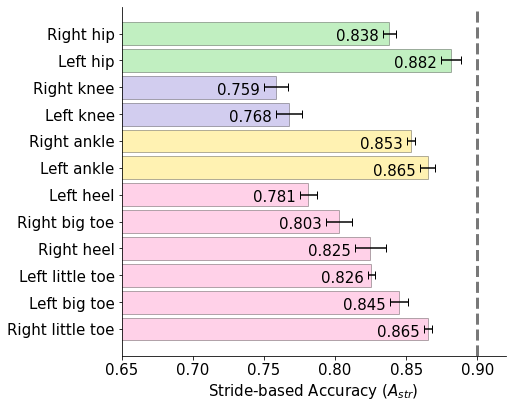

In [199]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(7, 5.5), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

'''
#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot
'''

plt.barh(width = task_gen_pi_df['stride_accuracy'], height = 0.85, data = task_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = task_gen_pi_df['std'], capsize = 4, label = 'Task-Gen',  y= np.array(range(len(task_gen_pi_df.index))))


#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in task_gen_pi_df.index]

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(task_gen_pi_df['colors'][i])
    bar.set_edgecolor = 'k'
        
#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- task_gen_pi_df['std'][idx]-0.008, p.get_y()-0.22),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 15)
fig.texts.append(axes.texts.pop())    
    
axes.set_yticks(np.arange(12))
axes.set_yticklabels(feature_display_names_sorted, fontsize = 15)
axes.set_ylim(-1,12)
axes.set_xlim(0.65, 0.92)
axes.set_xlabel(task_gen_metric_display_name, fontsize = 15)
# axes.set_title('Task-Gen', fontsize = 13)

#Adding a line showing the best Task-Gen metric in best regress-N model
axes.axvline(x=0.90, color = 'dimgray', alpha = 0.9, linestyle = '--', linewidth = 3)

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\PI_task_gen.png', dpi = 250, bbox_inches='tight')
plt.show()

### Subject generalization Permutation Importance 
* Best subject gen W model is 
* Best subject gen WT model is 

In [ ]:
#Subject gen 
subject_gen_pi_df = pd.DataFrame(subject_gen_pi.loc[subject_gen_metric, ordered_features_mean])
subject_gen_pi_df.index = ordered_features
subject_gen_pi_df['std'] = subject_gen_pi.loc[subject_gen_metric, ordered_features_std].values

subject_gen_pi_df['colors'] = colors
subject_gen_pi_df['color_order'] = color_order
#Sorting the subject gen PI metric within each group 
subject_gen_pi_df = subject_gen_pi_df.sort_values(by = ['color_order', subject_gen_metric], ascending= False)

In [ ]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 13}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 2, sharex=False, sharey = False, figsize=(15, 7), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes[0], xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot

#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in task_gen_pi_df.index]

#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes[0].patches):
    axes[0].annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- task_gen_pi_df['std'][idx]-0.004, p.get_y()-0.35),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 13)
fig.texts.append(axes[0].texts.pop())    
    
axes[0].set_yticks(np.arange(21))
axes[0].set_yticklabels(feature_display_names_sorted, fontsize = 13)
axes[0].set_ylim(-1,21)
axes[0].set_xlim(0.74, 0.93)
axes[0].set_xlabel(task_gen_metric_display_name, fontsize = 13)
axes[0].set_title('Task-Gen', fontsize = 13)

#Bar plot for the subject gen 
sns.barplot(x = subject_gen_metric, y = subject_gen_pi_df.index, data=subject_gen_pi_df, palette= subject_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes[1], xerr = subject_gen_pi_df['std']*1, ecolor = 'grey', capstyle='projecting'\
           , alpha = 0.6)
feature_display_names_sorted2 = [feature_dic[x] for x in subject_gen_pi_df.index]

for idx, p in enumerate(axes[1].patches):
    axes[1].annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width()- subject_gen_pi_df['std'][idx]-0.015, p.get_y()-0.35),
                xytext=(7, 10), textcoords='offset points', fontsize = 13)
fig.texts.append(axes[1].texts.pop())  

#Adding a line showing the best Task-Gen metric in best regress-N model
axes[0].axvline(x=0.92, color = 'r', alpha = 0.5, linestyle = '-.')
#Adding a line showing the best Subject-Gen metric in the best regress-N model 
axes[1].axvline(x=0.83, color = 'r', alpha = 0.5, linestyle = '-.')

axes[1].set_yticks(np.arange(21))
axes[1].set_yticklabels(feature_display_names_sorted2, fontsize = 13)
axes[1].set_ylim(-1,21)
axes[1].set_xlim(0.74, 0.87)
axes[1].set_xlabel(subject_gen_metric_display_name, fontsize = 13)
axes[1].set_title('Subject-Gen', fontsize = 13)

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('D:\\gait\\results\\feature_importance\\plots\\PI_side_by_side.png', dpi = 250, bbox_inches='tight')
plt.show()